# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

#### 1)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x) :
    return np.exp(x)*np.log(x)

N = np.logspace(1,7,7)

def montecarlo(f,N,a,b):
    u = np.random.uniform(a,b,N)
    return np.mean(f(u))*(b-a)

table = pd.DataFrame(columns=["Aproximacion","Error"], index=N)

for i in N: 
    table.loc[i, "Aproximacion"]= montecarlo(f, int(i), 1, 3)
    
table["Error"] = np.abs(14.0275 - table["Aproximacion"])
table


,Aproximacion,Error
10.0,16.348849,2.321349
100.0,16.198696,2.171196
1000.0,14.706918,0.679418
10000.0,14.142211,0.114711
100000.0,14.023538,0.003962
1000000.0,14.031587,0.004087
10000000.0,14.0289,0.0014


#### 2)

In [3]:
def fsin(x) :
    return np.sin(x)*np.log(x)

N = np.logspace(1,7,7)

def montecarlo(f,N,a,b):
    u = np.random.uniform(a,b,N)
    return np.mean(f(u))*(b-a)

table2 = pd.DataFrame(columns=["Aproximacion2","Error2"], index=N)

for i in N: 
    table2.loc[i, "Aproximacion2"]= montecarlo(fsin, int(i), 1, 3)
    
table2["Error2"] = np.abs(0.86984 - table2["Aproximacion2"])
table2

,Aproximacion2,Error2
10.0,1.00563,0.13579
100.0,0.92171,0.05187
1000.0,0.854356,0.015484
10000.0,0.868128,0.001712
100000.0,0.871231,0.001391
1000000.0,0.869942,0.000102
10000000.0,0.869927,0.000087


### 2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [15]:
def montecarlo2(region,ax,bx,ay,by,N):
    x = np.random.uniform(ax,bx,int(N))
    y = np.random.uniform(ay,by,int(N))
    B = region(x,y)
    AR = (bx-ax)*(by-ay)
    return np.mean(B)*AR

def bernoulli(x,y):
    return ((x**2+2*y**2) <= (-2*x+8*y-7))

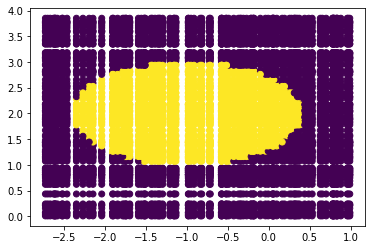

In [16]:
n = 100
x = np.random.uniform(-3,1,n)
y = np.random.uniform(0,4,n)
X, Y = np.meshgrid(x,y)

plt.figure()
plt.scatter(X, Y, c= bernoulli(X,Y))

In [27]:
N = np.logspace(1,7,7)

ax = -3
bx = 1
ay = 0
by = 4

table3 = pd.DataFrame(columns=["Aproximacion3","Error3"], index=N)

for i in N: 
    table3.loc[i, "Aproximacion3"]= montecarlo2(bernoulli, ax, bx, ay, by, i)

table3

#preguntar error.


,Aproximacion3,Error3
10.0,3.2,NaN
100.0,3.84,NaN
1000.0,4.56,NaN
10000.0,4.4208,NaN
100000.0,4.46864,NaN
1000000.0,4.44776,NaN
10000000.0,4.441434,NaN


### 3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

#### 1. Rentabilidad de proyectos:
Se puede calcular a base de simulaciones la "Tasa Interna de Rendimiento" o "TIR' dando a conocer la utilidad del proyecto haciendo conocer si vale la pena invertir o no.

**Liga:** https://blog.selfbank.es/el-metodo-montecarlo-en-finanzas/

#### 2. Riesgos:
Al igual, se puede calcular el riesgo que se llega a correr en una posición financiera ya que se simulan múltiples escenarios con un modelo de variación lo cual determina la probabilidad de que suceda un evento.

**Liga:** https://blog.selfbank.es/el-metodo-montecarlo-en-finanzas/

#### 3. Determinación de precios futuros:
Al tener el comportamiento de un activo financiero se puede simular su desempeño financiero determinando su valor y probabilidad de éxito.

**Liga:** https://exituscapital.com/simulacion-de-montecarlo-en-finanzas/